In [1]:
# Packages needed for Neural Network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

### Loading in the Images

In [2]:
# Creating a train generator
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = .2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )

Found 1832 images belonging to 2 classes.


In [3]:
# Creating a validation generator
validation_generator = train_datagen.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'binary',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )

Found 456 images belonging to 2 classes.


In [4]:
# Creating a test generator
test_dir = '\\Users\\somdd\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\test\\test'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24
                                                   )

Found 980 images belonging to 2 classes.


### Visualizations

In [5]:
# Looking at the counts for each label
meat_labels = train_generator.classes
meat_label, meat_count = np.unique(meat_labels, return_counts=True)
print('Meat Quality {}'.format(list(zip(meat_label, meat_count))))

Meat Quality [(0, 916), (1, 916)]


In [6]:
train_generator.class_indices

{'fresh': 0, 'rotten': 1}

In [7]:
def print_image(condition, index):
    image = os.listdir('\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train\\{}'.format(condition))[index]
    print(image)
    path = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train\\{}\\{}'.format(condition,image)
    print(path)
    plt.imshow(tf.keras.utils.load_img(path, target_size=(350, 750)))  

Rotten (1709).jpg
\Users\somdd\Documents\Flatiron\Phase_5\Hello-Fresh\train\train\rotten\Rotten (1709).jpg


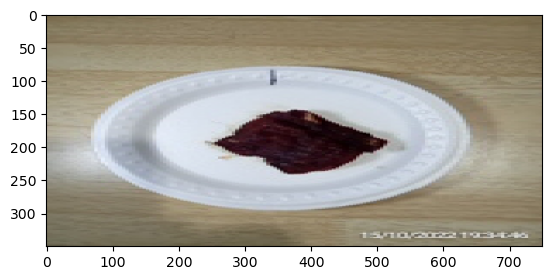

In [8]:
print_image('rotten', 30)

Fresh (100).jpg
\Users\somdd\Documents\Flatiron\Phase_5\Hello-Fresh\train\train\fresh\Fresh (100).jpg


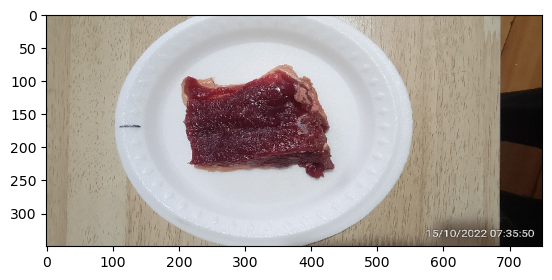

In [9]:
print_image('fresh', 1)

In [60]:
rgb, labels = train_generator.next()
zipped = list(zip(rgb,labels))

In [70]:
zipped[20][1]

1.0

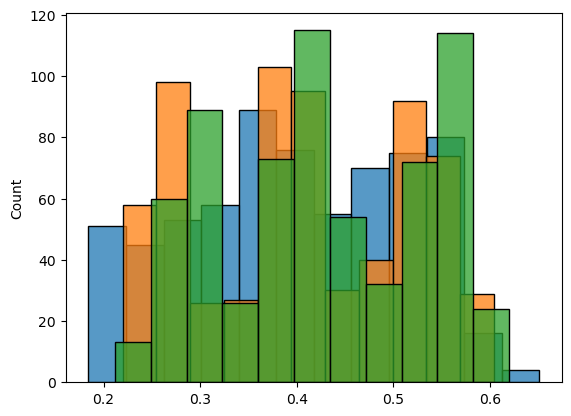

In [61]:
import seaborn as sns
sns.histplot(list(zipped[0][0][0].flatten()))
sns.histplot(list(zipped[0][0][1].flatten()))
sns.histplot(list(zipped[0][0][2].flatten()));

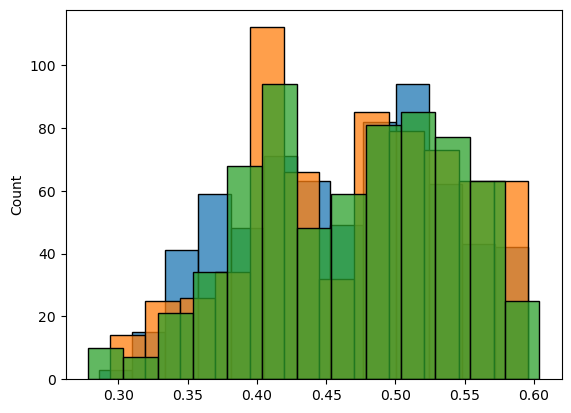

In [69]:
sns.histplot(list(zipped[20][0][0].flatten()))
sns.histplot(list(zipped[20][0][1].flatten()))
sns.histplot(list(zipped[20][0][2].flatten()));

In [149]:
train_generator.image_shape

(224, 224, 3)

### Modeling

In [72]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

#### FSM

In [73]:
# Building a first simple CNN and looking at the architecture
fsmodel = Sequential()
fsmodel.add(Conv2D(filters = 32, 
                   kernel_size = (4,4), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same'))
fsmodel.add(MaxPooling2D(pool_size = (2,2)))
fsmodel.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same'))
fsmodel.add(MaxPooling2D(pool_size = (2,2)))
fsmodel.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same'))
fsmodel.add(Flatten())
fsmodel.add(Dense(32, activation = 'relu'))
fsmodel.add(Dense(1, activation = 'sigmoid'))
fsmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 200704)            0

In [74]:
fsmodel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
fsm_cnn = fsmodel.fit(train_generator, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator)

Epoch 1/20
20/20 [==============================] - 52s 3s/step - loss: 0.9688 - accuracy: 0.5672 - val_loss: 0.4947 - val_accuracy: 0.9276
Epoch 2/20
20/20 [==============================] - 50s 3s/step - loss: 0.3252 - accuracy: 0.8656 - val_loss: 0.2249 - val_accuracy: 0.9123
Epoch 3/20
20/20 [==============================] - 51s 3s/step - loss: 0.1803 - accuracy: 0.9219 - val_loss: 0.0540 - val_accuracy: 0.9912
Epoch 4/20
20/20 [==============================] - 51s 3s/step - loss: 0.0474 - accuracy: 0.9891 - val_loss: 0.0528 - val_accuracy: 0.9890
Epoch 5/20
20/20 [==============================] - 52s 3s/step - loss: 0.0436 - accuracy: 0.9891 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 49s 2s/step - loss: 0.0580 - accuracy: 0.9854 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 50s 3s/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 9.9770e-04 - val_accuracy: 1.0000
Epoch 8/20
20/20

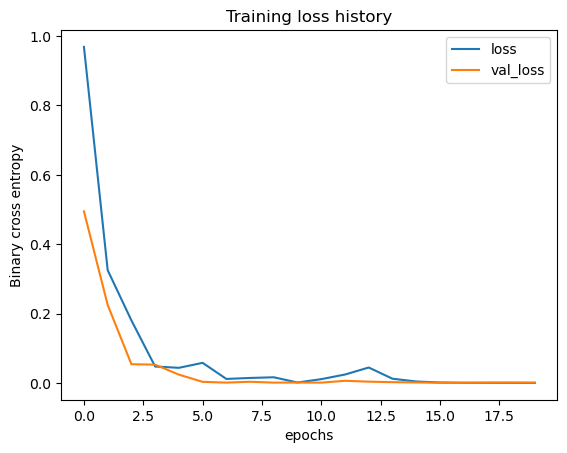

In [75]:
fsm_cnn_df =  pd.DataFrame(fsm_cnn.history)
fsm_cnn_df.index.name = 'epochs'
col_list = ['loss', 'val_loss']
fsm_cnn_df[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

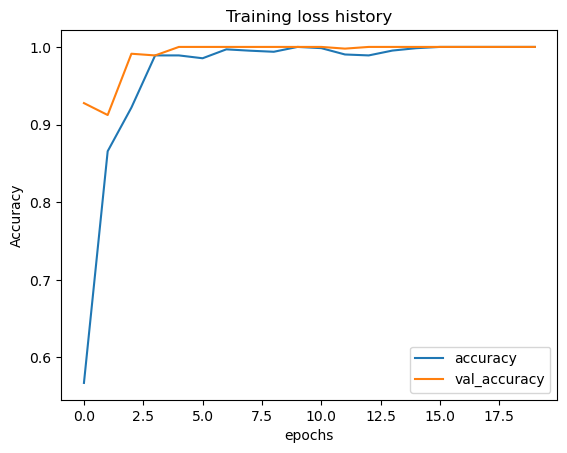

In [76]:
col_list = ['accuracy', 'val_accuracy']
fsm_cnn_df[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [78]:
test_loss, test_acc = fsmodel.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

31/31 [==============================] - 45s 1s/step - loss: 0.0701 - accuracy: 0.9806
Test loss: 0.07009971886873245 Test Acc: 0.9806122183799744
